# Определение перспективного тарифа для телеком компании

# Введение

Компания «Мегалайн» — федеральный оператор сотовой связи — предлагает своим Клиентам два тарифных плана: «Смарт» и «Ультра». Для корректировки рекламного бюджета, коммерческому департаменту нужна информация о том, какой тариф приносит больше денег.

<b>Цель работы:</b> выполнить предварительный анализ тарифов на небольшой выборке клиентов по данным 500 пользователей «Мегалайна» за 2018 год. : кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проанализировать поведение клиентов (сколько совершают звонков, отправляют сообщений и какой объем траффика используют) и сделать вывод — какой тариф лучше.

<b>Описание тарифов:</b>
<div><b>Тариф «Смарт»</b></div>
<div>Ежемесячная плата: 550 рублей</div>
<div>Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика</div>
<div>Стоимость услуг сверх тарифного пакета:</div> 
<div>минута разговора: 3 рубля</div>
<div>сообщение: 3 рубля</div>
<div>1 Гб интернет-трафика: 200 рублей</div>

<b>Тариф «Ультра»</b>
<div>Ежемесячная плата: 1950 рублей</div>
<div>Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика</div>
<div>Стоимость услуг сверх тарифного пакета:</div>
<div>минута разговора: 1 рубль</div>
<div>сообщение: 1 рубль</div>
<div>1 Гб интернет-трафика: 150 рублей</div>

Значения минут и мегабайтов округляются в большую сторону.

<b>План выполнения работы:</b>
1. Изучение файлов с данными. Общая информация;
2. Подготовка данных: 
<div>- приведение данных к нужным типам;</div> 
<div>- исправление ошибок в данных;</div>
<div>- выполнение необходимых расчетов.</div>
3. Анализ данных: 
<div>- описание поведения клиентов оператора;</div> 
<div>- расчет среднего количества;</div> 
<div>- дисперсии и стандартнго отклонения;</div>  
<div>- построение гистограмм и описание распределений.</div> 
4. Проверка гипотез:
<div>- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;</div>
<div>- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.</div>
5. Общий вывод

<b>Описание входных переменных:</b>
<div><b>Таблица users (информация о пользователях):</b></div>
<div>user_id — уникальный идентификатор пользователя</div> 
<div>first_name — имя пользователя</div> 
<div>last_name — фамилия пользователя</div> 
<div>age — возраст пользователя (годы)</div> 
<div>reg_date — дата подключения тарифа (день, месяц, год)</div> 
<div>churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)</div> 
<div>city — город проживания пользователя</div> 
<div>tariff — название тарифного плана</div> 

<b>Таблица calls (информация о звонках):</b>
<div>id — уникальный номер звонка</div>
<div>call_date — дата звонка</div>
<div>duration — длительность звонка в минутах</div>
<div>user_id — идентификатор пользователя, сделавшего звонок</div>

<b>Таблица messages (информация о сообщениях):</b>
<div>id — уникальный номер сообщения</div>
<div>message_date — дата сообщения</div>
<div>user_id — идентификатор пользователя, отправившего сообщение</div>

<b>Таблица internet (информация об интернет-сессиях):</b>
<div>id — уникальный номер сессии</div>
<div>mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)</div>
<div>session_date — дата интернет-сессии</div>
<div>user_id — идентификатор пользователя</div>

<b>Таблица tariffs (информация о тарифах):</b>
<div>tariff_name — название тарифа</div>
<div>rub_monthly_fee — ежемесячная абонентская плата в рублях</div>
<div>minutes_included — количество минут разговора в месяц, включённых в абонентскую плату</div>
<div>messages_included — количество сообщений в месяц, включённых в абонентскую плату</div>
<div>mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)</div>
<div>rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)</div>
<div>rub_per_message — стоимость отправки сообщения сверх тарифного пакета</div>
<div>rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)</div>

## Шаг 1. Изучение файлов с данными. Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Датасет users

Поочередно рассмотрим все 5 представленных для выполнения проекта датасетов:

In [2]:
users = pd.read_csv('/datasets/users.csv')
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
users['user_id'].nunique()

500

Датасет *users* содержит информацию о 500 пользователях.

### Датасет calls

In [5]:
calls = pd.read_csv('/datasets/calls.csv')
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
calls['user_id'].nunique()

492

Датасет *calls* содержит информацию о 492 пользователях.

### Датасет messages

In [8]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [9]:
messages['user_id'].nunique()

426

Датасет *messages* содержит информацию о 426 пользователях.

### Датасет internet

In [10]:
internet = pd.read_csv('/datasets/internet.csv')
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [12]:
internet['user_id'].nunique()

497

Датасет *internet* содержит информацию о 497 пользователях.

### Датасет tariffs

In [13]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Вывод**

Рассмотрим полученную информацию.

Для выполнения проекта предоставлено 5 датасетов:

1. В таблице users представлена общая информация о пользователях:
user_id — уникальный идентификатор пользователя;
first_name — имя пользователя;
last_name — фамилия пользователя;
age — возраст пользователя (годы);
reg_date — дата подключения тарифа (день, месяц, год);
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
city — город проживания пользователя;
tariff — название тарифного плана.

Всего в таблице 8 столбцов и 500 записей. Каждая запись - информация об одном из 500 клиентов оператора.

Наименования столбцов указаны корректно. В столбце churn_date (дата прекращения пользования тарифом) - имеется 462 пропущенных значения (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Информация в столбцах churn_date и reg_date (дата подключения тарифа) имеет тип данных object.

2. Таблица calls содержит информацию о звонках, совершенных клиентами оператора:
id — уникальный номер звонка;
call_date — дата звонка;
duration — длительность звонка в минутах;
user_id — идентификатор пользователя, сделавшего звонок.

Всего в таблице 4 столбца и 202607 записей. Каждая запись - информация об одном звонке по 492 клиентам оператора. Можно сделать вывод, что 8 пользователей из 500 не пользуются стандартной мобильной связью. Вероятно, они либо пользуются мобильным траффиком, либо в рассматриваемом периоде не пользовались услугами сотового оператора.

Наименования столбцов указаны корректно, пропущенные значения отсутствуют. В столбце call_date (дата звонка) данные имеют тип данных object.

3. Таблица messages содержит информацию о дате и количестве сообщенияй, отправляемых пользователями:
id — уникальный номер сообщения;
message_date — дата сообщения;
user_id — идентификатор пользователя, отправившего сообщение.

Всего в таблице 3 столбца и 123036 записей. Каждая запись - общая информация об одном сообщении по 497 клиентам оператора. Таким образом, всего 3 клиента мобильного оператора из 500 не пользуются услугой мобильного интернета.

Наименования столбцов указаны корректно, пропущенные значения отсутствуют. В столбце message_date (дата сообщения) данные имеют тип данных object.

4. Таблица internet содержит информацию об интернет-сессиях клиентов оператора:
id — уникальный номер сессии;
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах);
session_date — дата интернет-сессии;
user_id — идентификатор пользователя.

Всего в таблице 4 столбца и 149396 записей. Каждая запись - общая информация об одной интернет-сессии по 426 клиентам оператора. Можно сделать вывод, что 74 пользователя из 500 не пользуются услугой отправки мобильных сообщений.

Наименования столбцов указаны корректно, пропущенные значения отсутствуют. В столбце session_date (дата интернет-сессии) данные имеют тип данных object.

5. В таблице tariffs представлена информация о тарифах - всего 2 тарифа smart и ultra:
tariff_name — название тарифа;
rub_monthly_fee — ежемесячная абонентская плата в рублях;
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату;
messages_included — количество сообщений в месяц, включённых в абонентскую плату;
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
rub_per_message — стоимость отправки сообщения сверх тарифного пакета;
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)/

Всего в таблице 8 столбцов и 2 записи. Наименования столбцов указаны корректно, пропущенные значения отсутствуют.

**Резюме:**

В таблицах содержится информация о 500 пользователях - клиентах мобильного оператора, из них:

- 38 клиентов прекратили пользоваться тарифом (услугами оператора);

- 8 клиентов не пользуются мобильной связью;

- 3 клиента не пользуются услугой мобильного интернета;

- 74 клиента не отправляют мобильные сообщения.

## Шаг 2. Подготовка данных

### Датасет users

In [15]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Для дальнейшей работы с датой, изменим тип данных в таблице в столбцах с датой с 'object' на 'datetime64'

In [16]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [17]:
# users.info()

Приведем к нижнему регистру значения в столбцах city, first_name и last_name

In [18]:
users['city'] = users['city'].str.lower()
users['first_name'] = users['first_name'].str.lower()
users['last_name'] = users['last_name'].str.lower()

In [19]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra
1,1001,41,NaT,москва,иван,ежов,2018-11-01,smart
2,1002,59,NaT,стерлитамак,евгений,абрамович,2018-06-17,smart
3,1003,23,NaT,москва,белла,белякова,2018-08-17,ultra
4,1004,68,NaT,новокузнецк,татьяна,авдеенко,2018-05-14,ultra


In [20]:
#users['city'].value_counts()

In [21]:
#users['first_name'].value_counts()

In [22]:
#users['last_name'].value_counts()

In [23]:
#users['tariff'].value_counts()

Проверим датафрейм на наличие дубликатов:

In [24]:
users.duplicated().sum()

0

Дубликатов не обнаружено.

### Датасет calls

In [25]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Для дальнейшей работы с датой, изменим тип данных в таблице в столбце call_date с 'object' на 'datetime64'

In [26]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [27]:
len(calls.query('duration == 0'))

39613

In [28]:
#calls.query('duration == 0').groupby('user_id').count()

По информации сотового опреатора - значения минут всегда округляются в большую сторону. В таблице calls в столбце с длительностью звонков присутствуют 39613 нулевых значений (0.00). Предположительно, это могут быть либо пропущенные вызовы, либо входящие - тарификация которых в рамках пакета тарифа не осуществляется. Поскольку, в задачи по условиям задания входит только определение количества сделанных звонков и израсходованных минут разговора по месяцам, нулевые значения звонков можно исключить из рассмотрения, оставив только исходящие вызовы.

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Молодец, что обнаружил проблему с большим количеством нулевых значений и прокомментировал, как мы будем эти нули обрабатывать. Для наглядности можно было бы еще построить гистограмму длительности звонков.</div>

Исключим нулевые значения из датасета:

In [29]:
calls_out = calls.query('duration > 0.00')
calls_out = calls_out.reset_index(drop = True)
#calls_out.head(10)

По условиям тарифных планов опреатора, округлим значения использованных минут в большую сторону (поминутная тарификация)

In [30]:
calls_out['duration'] = calls_out['duration'].apply(np.ceil).astype('int')
calls_out.head()

,id,call_date,duration,user_id
0,1000_2,2018-06-11,3,1000
1,1000_3,2018-09-21,14,1000
2,1000_4,2018-12-15,6,1000
3,1000_7,2018-08-22,19,1000
4,1000_8,2018-09-15,19,1000


Проверим датафрейм на наличие дубликатов:

In [31]:
calls_out.duplicated().sum()

0

Дубликатов не обнаружено.

### Датасет messages

Для дальнейшей работы с датой, изменим тип данных в таблице в столбце message_date с 'object' на 'datetime64'

In [32]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [33]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Проверим датафрейм на наличие дубликатов:

In [34]:
messages.duplicated().sum()

0

Дубликатов не обнаружено.

### Датасет internet

Для дальнейшей работы с датой, изменим тип данных в таблице в столбце session_date с 'object' на 'datetime64'

In [35]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [36]:
len(internet.query('mb_used == 0'))

19598

In [37]:
#internet.query('mb_used == 0').groupby('user_id').count()

Длительность многих интернет-сессий - 0.0 Мб. Однозначного ответа для данной аномалии нет. Возможно, в данном случае идет речь о исходящем траффике, не учитываемом в тарифе оператора. 

Исключим нулевые значения из датасета:

In [38]:
internet_used = internet.query('mb_used > 0')
internet_used = internet_used.reset_index(drop = True)
#internet_used.head(10)

По условиям тарифных планов опреатора, округлим значения использованных мб траффика в большую сторону:

In [39]:
internet_used['mb_used'] = internet_used['mb_used'].apply(np.ceil).astype('int')
internet_used.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113,2018-11-25,1000
1,1,1000_1,1053,2018-09-07,1000
2,2,1000_2,1198,2018-06-25,1000
3,3,1000_3,551,2018-08-22,1000
4,4,1000_4,303,2018-09-24,1000


Проверим датафрейм на наличие дубликатов:

In [40]:
internet_used.duplicated().sum()

0

Дубликатов не обнаружено.

### Датасет users

Исходя из условий задачи, из таблицы users необходимо получить данные по тарифу каждого клиента:

In [41]:
users['month'] = users['reg_date'].dt.month
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,5
1,1001,41,NaT,москва,иван,ежов,2018-11-01,smart,11
2,1002,59,NaT,стерлитамак,евгений,абрамович,2018-06-17,smart,6
3,1003,23,NaT,москва,белла,белякова,2018-08-17,ultra,8
4,1004,68,NaT,новокузнецк,татьяна,авдеенко,2018-05-14,ultra,5


Проверим датафрейм на наличие дубликатов:

In [42]:
users.duplicated().sum()

0

Дубликатов не обнаружено.

In [43]:
users_pivot = users.pivot_table(index=['user_id', 'month'], values=['city', 'tariff'], aggfunc='first')
#users_pivot.sample(10)

In [44]:
users_pivot.columns = ['city', 'tariff_name']
users_pivot.sample(10)

,,city,tariff_name
user_id,month,,
1064,3,якутск,smart
1072,2,уфа,smart
1494,8,омск,smart
1357,9,томск,smart
1043,7,ставрополь,smart
1085,6,омск,ultra
1009,3,пермь,smart
1256,9,санкт-петербург,smart
1257,6,санкт-петербург,ultra


**Вывод**

1.	Во всех таблицах в столбцах с датой изменен тип данных с 'object' на 'datetime64'.
2.	В таблице users имена клиентов и названия городов приведены к нижнему регистру.
3.	В таблицах calls и internet нулевые значения в столбцах с использованными минутами и мб не приняты к учету, т.к. отсутствует логичное значения для замены, а нулевые значения не тарифицируется.
4.	В таблицах calls и internet значения в использованных минут и мб округлены в большую сторону с учетом условий тарификации мобильного оператора.
5.	Выполнена проверка таблиц на наличие дубликатов. Дубликатов не обнаружено.

### Расчет количества сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя

In [45]:
#calls_out.head(5)

In [46]:
calls_out['month'] = calls_out['call_date'].dt.month
calls_out.head(5)

,id,call_date,duration,user_id,month
0,1000_2,2018-06-11,3,1000,6
1,1000_3,2018-09-21,14,1000,9
2,1000_4,2018-12-15,6,1000,12
3,1000_7,2018-08-22,19,1000,8
4,1000_8,2018-09-15,19,1000,9


In [47]:
calls_pivot = calls_out.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=('sum', 'count'))
#calls_pivot.head(10)

In [48]:
calls_pivot.columns = ['calls_count', 'minutes_sum']
calls_pivot.head(10)

calls_count  minutes_sum
user_id month                          
1000    5               17          159
        6               28          172
        7               41          340
        8               42          408
        9               46          466
        10              44          350
        11              37          338
        12              38          333
1001    11              45          430
        12              47          414

### Расчет количества отправленных сообщений по месяцам

In [49]:
#messages.head(5)

In [50]:
messages['month'] = messages['message_date'].dt.month
messages.head(5)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [51]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=('count'))
#messages_pivot.head(10)

In [52]:
messages_pivot.columns = ['messages_count']
messages_pivot.head(10)

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11

### Расчет объема израсходованного интернет-трафика по месяцам

In [53]:
#internet.head(5)

In [54]:
internet_used['month'] = internet_used['session_date'].dt.month
internet_used.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,11
1,1,1000_1,1053,2018-09-07,1000,9
2,2,1000_2,1198,2018-06-25,1000,6
3,3,1000_3,551,2018-08-22,1000,8
4,4,1000_4,303,2018-09-24,1000,9


In [55]:
internet_pivot = internet_used.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=('sum'))
internet_pivot.head(10)

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
        10       14717
        11       14768
        12        9827
1001    11       18452
        12       14053

### Расчет помесячной выручки с каждого пользователя

Для расчета помесячной выручки сначала создадим новый датафрейм df и  объединим данные всех таблиц в один df методом *merge()*:

In [56]:
df = calls_pivot

In [57]:
df = df.merge(messages_pivot, on=['user_id', 'month'], how='outer')
#print(df.head(10))

In [58]:
df = df.merge(internet_pivot, on=['user_id', 'month'], how='outer')
#print(df.head(10))

In [59]:
df = df.merge(users_pivot, on=['user_id', 'month'], how='outer')
df.sample(10)

,,calls_count,minutes_sum,messages_count,mb_used,city,tariff_name
user_id,month,,,,,,
1146,8,47.0,438.0,93.0,19568.0,NaN,NaN
1458,10,92.0,855.0,1.0,20217.0,NaN,NaN
1044,11,45.0,369.0,16.0,16427.0,NaN,NaN
1395,12,71.0,627.0,25.0,16309.0,NaN,NaN
1402,5,80.0,689.0,32.0,27453.0,NaN,NaN
1300,7,12.0,103.0,33.0,6757.0,москва,ultra
1378,7,59.0,517.0,12.0,11875.0,NaN,NaN
1282,5,66.0,637.0,80.0,8996.0,NaN,NaN
1199,10,61.0,511.0,72.0,8319.0,NaN,NaN


In [60]:
df['tariff_name'].value_counts()

smart    351
ultra    149
Name: tariff_name, dtype: int64

In [61]:
df['tariff_name'].fillna(df.groupby('user_id')['tariff_name'].transform('first'), inplace = True)
df['city'].fillna(df.groupby('user_id')['city'].transform('first'), inplace = True)
#df.head(20)

Значения NaN в столбцах таблицы с минутами, сообщениями и траффиком означают, что клиент в отчетном месяце не пользовался данным видом услуги. Проверим таблицу на наличие таких пропущенных значений:

In [62]:
df.isnull().sum() 

calls_count        48
minutes_sum        48
messages_count    499
mb_used            15
city                0
tariff_name         0
dtype: int64

Заменим в столбцах таблицы с минутами, сообщениями и траффиком пропущенные значения на нули и повторно проверим таблицу на наличие пропусков:

In [63]:
df['calls_count'] = df['calls_count'].fillna(0)
df['minutes_sum'] = df['minutes_sum'].fillna(0)
df['messages_count'] = df['messages_count'].fillna(0)
df['mb_used'] = df['mb_used'].fillna(0)

Выполним в данных столбцах замену вещественного типа данных на целочисленный:

In [64]:
df['calls_count'] = df['calls_count'].astype('int')
df['minutes_sum'] = df['minutes_sum'].astype('int')
df['messages_count'] = df['messages_count'].astype('int')
df['mb_used'] = df['mb_used'].astype('int')

In [65]:
df.isnull().sum()

calls_count       0
minutes_sum       0
messages_count    0
mb_used           0
city              0
tariff_name       0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3216 entries, (1000, 5) to (1371, 12)
Data columns (total 6 columns):
calls_count       3216 non-null int64
minutes_sum       3216 non-null int64
messages_count    3216 non-null int64
mb_used           3216 non-null int64
city              3216 non-null object
tariff_name       3216 non-null object
dtypes: int64(4), object(2)
memory usage: 164.3+ KB


In [67]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [68]:
#df.loc[df['tariff_name'] == 'smart', 'proceeds'] = ((df['minutes_sum'] - 500) * 3) \
#+ ((df['messages_count'] - 50) * 3) \
#+ ((df['mb_used'] - 15360) * (200 / 1024)) + 550

#df.loc[df['tariff_name'] == 'ultra', 'proceeds'] = ((df['minutes_sum'] - 3000) * 1) \
#+ ((df['messages_count'] - 1000) * 1) \
#+ ((df['mb_used'] - 30720) * (150 / 1024)) + 1950

#df.head(15)

In [69]:
#df.query('proceeds > 0')

#Учтем, что ежемесячная плата клиента не может быть меньше ежемесячной абонентской платы:

In [70]:
#df.loc[(df['tariff_name'] == 'smart') & (df['proceeds'] < 550), 'proceeds'] = 550

#df.loc[(df['tariff_name'] == 'ultra') & (df['proceeds'] < 1950), 'proceeds'] = 1950

In [71]:
def monthly_proceeds(row):
    money = 0
    tariff_name = row['tariff_name']
    minutes_sum = row['minutes_sum']
    messages_count = row['messages_count']
    mb_used = row['mb_used']

#Разница между потраченными минутами, трафиком, смс и объемом услуг, включенных в абонентскую плату:
    if tariff_name == 'smart':
        difference_calls = minutes_sum - tariffs.loc[0, 'minutes_included']
        difference_messages = messages_count - tariffs.loc[0, 'messages_included']
        difference_internet = mb_used - tariffs.loc[0, 'mb_per_month_included']

    #Если пользователь вышел за пределы лимитов, обозначенных в абонентской плате, то рассчитывается дополнительная оплата:
        if (difference_calls > 0):
            money += difference_calls * tariffs.loc[0, 'rub_per_minute']
        if difference_messages > 0: 
            money += difference_messages * tariffs.loc[0, 'rub_per_message']
        if difference_internet > 0: 
            money += difference_internet * tariffs.loc[0, 'rub_per_gb'] / 1024

    #Добавление ежемесячной абонентской платы
        money += tariffs.loc[0, 'rub_monthly_fee']
        return money
    else:
        difference_calls = minutes_sum - tariffs.loc[1, 'minutes_included']
        difference_messages = messages_count - tariffs.loc[1, 'messages_included']
        difference_internet = mb_used - tariffs.loc[1, 'mb_per_month_included']

        if (difference_calls > 0):
            money += difference_calls * tariffs.loc[1, 'rub_per_minute']
        if difference_messages > 0: 
            money += difference_messages * tariffs.loc[1, 'rub_per_message']
        if difference_internet > 0: 
            money += difference_internet * tariffs.loc[1, 'rub_per_gb'] / 1024

        money += tariffs.loc[1, 'rub_monthly_fee']
        return money

df['proceeds'] = df.apply(monthly_proceeds, axis=1)

Проверим результат путем выборки 20 случайных строк из таблицы:

In [72]:
df.sample(20)

,,calls_count,minutes_sum,messages_count,mb_used,city,tariff_name,proceeds
user_id,month,,,,,,,
1325,9,51,495,7,23087,новосибирск,ultra,1950.000000
1186,12,75,659,51,10486,самара,smart,1030.000000
1447,11,72,644,64,19109,москва,smart,1756.226562
1356,11,122,1030,162,23771,москва,ultra,1950.000000
1096,4,43,416,73,13627,брянск,ultra,1950.000000
1381,1,42,382,32,14808,москва,ultra,1950.000000
1458,3,99,833,1,13327,барнаул,ultra,1950.000000
1377,2,20,179,2,0,брянск,ultra,1950.000000
1006,8,32,275,0,19327,ульяновск,smart,1324.804688


In [73]:
df['proceeds'] = df['proceeds'].astype('int')
df.sample(5)

,,calls_count,minutes_sum,messages_count,mb_used,city,tariff_name,proceeds
user_id,month,,,,,,,
1106,8,0,0,25,19105,калуга,ultra,1950
1325,8,63,575,19,25528,новосибирск,ultra,1950
1285,2,8,79,31,645,краснодар,smart,550
1127,6,22,208,87,14170,казань,smart,661
1429,9,20,138,0,18122,санкт-петербург,smart,1089


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3216 entries, (1000, 5) to (1371, 12)
Data columns (total 7 columns):
calls_count       3216 non-null int64
minutes_sum       3216 non-null int64
messages_count    3216 non-null int64
mb_used           3216 non-null int64
city              3216 non-null object
tariff_name       3216 non-null object
proceeds          3216 non-null int64
dtypes: int64(5), object(2)
memory usage: 189.4+ KB


Данные подготовлены для последующего анализа.

**Вывод**

1.	С применением метода pivot_table() выполнены расчеты сделанных звонком и израсходованных минут, количества отправленных интернет-сообщений и израсходованного интернет-траффика.
2.	Выполнено объединение таблиц в один новый датафрейм df с использованием метода merge().
3.	Выполнен расчет помесячной выручки с каждого пользователя.
4.	Пропущенные значения NaN в столбцах таблицы с минутами, сообщениями и траффиком заменены на нули. В данных столбцах выполнена замена вещественного типа данных на целочисленный.

## Шаг 3. Анализ данных

### Пользователи тарифного плана "Смарт"

Сформируем выборку клиентов, подключенных к тарифному плану "Смарт":

In [75]:
users_smart = df.query('tariff_name == "smart"')
users_smart.head(10)

calls_count  minutes_sum  messages_count  mb_used  \
user_id month                                                      
1001    11              45          430               0    18452   
        12              47          414               0    14053   
1002    6               14          117               4    10871   
        7               21          214              11    17601   
        8               37          289              13    20347   
        9               25          206               4    16712   
        10              24          212              10    13905   
        11              25          243              16    18610   
        12              27          236              12    18137   
1005    1               11           95               7     2730   

                           city tariff_name  proceeds  
user_id month                                          
1001    11               москва       smart      1153  
        12               москва       smart       550  
1002    6           стерлитамак       smart       550  
        7           стерлитамак       smart       987  
        8           стерлитамак       smart      1524  
        9           стерлитамак       smart       814  
        10          стерлитамак       smart       550  
        11          стерлитамак       smart      1184  
        12          стерлитамак       smart      1092  
1005    1      набережные челны       smart       550

Изучим датасет с помощью метода describe()

In [76]:
users_smart.describe()

,calls_count,minutes_sum,messages_count,mb_used,proceeds
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,46.926457,417.747534,33.369058,16221.910762,1232.751570
std,21.057932,190.476754,28.230396,5886.299627,787.500205
min,0.000000,0.000000,0.000000,0.000000,550.000000
25%,32.000000,282.000000,10.000000,12645.250000,550.000000
50%,47.000000,421.500000,28.000000,16529.000000,959.000000
75%,61.000000,545.000000,51.000000,20068.000000,1667.500000
max,162.000000,1435.000000,143.000000,38610.000000,6711.000000


В выборке представлены все клиенты тарифа smart, поэтому можно считать выборку генеральной совокупностью.

Выполним оценку среднего количества, дисперсии и стандартного отклонения использованных минут разговора:

In [77]:
smart_minutes_mean = users_smart['minutes_sum'].mean()
smart_minutes_median = users_smart['minutes_sum'].median()
smart_minutes_variance = np.var(users_smart['minutes_sum'], ddof=1)
smart_minutes_standard_dev = np.std(users_smart['minutes_sum'], ddof=1)

print('Среднее количество использованных минут разговора тарифа "Смарт":', smart_minutes_mean)
print('Медиана количества использованных минут разговора тарифа "Смарт":', smart_minutes_median)
print('Дисперсия использованных минут разговора тарифа "Смарт":', smart_minutes_variance)
print('Стандартное отклонение использованных минут разговора тарифа "Смарт":', smart_minutes_standard_dev)

Среднее количество использованных минут разговора тарифа "Смарт": 417.747533632287
Медиана количества использованных минут разговора тарифа "Смарт": 421.5
Дисперсия использованных минут разговора тарифа "Смарт": 36281.39383644458
Стандартное отклонение использованных минут разговора тарифа "Смарт": 190.4767540579285


Выполним оценку среднего количества, дисперсии и стандартного отклонения использованных сообщений:

In [78]:
smart_messages_mean = users_smart['messages_count'].mean()
smart_messages_median = users_smart['messages_count'].median()
smart_messages_variance = np.var(users_smart['messages_count'], ddof=1)
smart_messages_standard_dev = np.std(users_smart['messages_count'], ddof=1)

print('Среднее количество использованных сообщений тарифа "Смарт":', smart_messages_mean)
print('Медиана количества использованных сообщений тарифа "Смарт":', smart_messages_median)
print('Дисперсия использованных сообщений тарифа "Смарт":', smart_messages_variance)
print('Стандартное отклонение использованных сообщений тарифа "Смарт":', smart_messages_standard_dev)

Среднее количество использованных сообщений тарифа "Смарт": 33.36905829596412
Медиана количества использованных сообщений тарифа "Смарт": 28.0
Дисперсия использованных сообщений тарифа "Смарт": 796.9552557301129
Стандартное отклонение использованных сообщений тарифа "Смарт": 28.230395954185852


Выполним оценку среднего количества, дисперсии и стандартного отклонения использованного траффика:

In [79]:
smart_mb_used_mean = users_smart['mb_used'].mean()
smart_mb_used_median = users_smart['mb_used'].median()
smart_mb_used_variance = np.var(users_smart['mb_used'], ddof=1)
smart_mb_used_standard_dev = np.std(users_smart['mb_used'], ddof=1)

print('Среднее количество использованного траффика тарифа "Смарт":', smart_mb_used_mean)
print('Медиана использованного траффика тарифа "Смарт":', smart_mb_used_median)
print('Дисперсия использованного траффика тарифа "Смарт":', smart_mb_used_variance)
print('Стандартное отклонение использованного траффика тарифа "Смарт":', smart_mb_used_standard_dev)

Среднее количество использованного траффика тарифа "Смарт": 16221.910762331838
Медиана использованного траффика тарифа "Смарт": 16529.0
Дисперсия использованного траффика тарифа "Смарт": 34648523.30069166
Стандартное отклонение использованного траффика тарифа "Смарт": 5886.299627158955


### Пользователи тарифного плана "Ультра"

Сформируем выборку клиентов, подключенных к тарифному плану "Ультра":

In [80]:
users_ultra = df.query('tariff_name == "ultra"')
users_ultra.head(10)

calls_count  minutes_sum  messages_count  mb_used       city  \
user_id month                                                                 
1000    5               17          159              22     2256  краснодар   
        6               28          172              60    23257  краснодар   
        7               41          340              75    14016  краснодар   
        8               42          408              81    14070  краснодар   
        9               46          466              57    14581  краснодар   
        10              44          350              73    14717  краснодар   
        11              37          338              58    14768  краснодар   
        12              38          333              70     9827  краснодар   
1003    8               43          380              37     8571     москва   
        9              105          961              91    12479     москва   

              tariff_name  proceeds  
user_id month                        
1000    5           ultra      1950  
        6           ultra      1950  
        7           ultra      1950  
        8           ultra      1950  
        9           ultra      1950  
        10          ultra      1950  
        11          ultra      1950  
        12          ultra      1950  
1003    8           ultra      1950  
        9           ultra      1950

Выполним оценку среднего количества, дисперсии и стандартного отклонения использованных минут разговора:

In [81]:
ultra_minutes_mean = users_ultra['minutes_sum'].mean()
ultra_minutes_median = users_ultra['minutes_sum'].median()
ultra_minutes_variance = np.var(users_ultra['minutes_sum'], ddof=1)
ultra_minutes_standard_dev = np.std(users_ultra['minutes_sum'], ddof=1)

print('Среднее количество использованных минут разговора тарифа "Ультра":', ultra_minutes_mean)
print('Медиана количества использованных минут разговора тарифа "Ультра":', ultra_minutes_median)
print('Дисперсия использованных минут разговора тарифа "Ультра":', ultra_minutes_variance)
print('Стандартное отклонение использованных минут разговора тарифа "Ультра":', ultra_minutes_standard_dev)

Среднее количество использованных минут разговора тарифа "Ультра": 526.0892494929006
Медиана количества использованных минут разговора тарифа "Ультра": 518.0
Дисперсия использованных минут разговора тарифа "Ультра": 101052.49354928387
Стандартное отклонение использованных минут разговора тарифа "Ультра": 317.8875485911392


Выполним оценку среднего количества, дисперсии и стандартного отклонения использованных сообщений:

In [82]:
ultra_messages_mean = users_ultra['messages_count'].mean()
ultra_messages_median = users_ultra['messages_count'].median()
ultra_messages_variance = np.var(users_ultra['messages_count'], ddof=1)
ultra_messages_standard_dev = np.std(users_ultra['messages_count'], ddof=1)

print('Среднее количество использованных сообщений тарифа "Ультра":', ultra_messages_mean)
print('Медиана количества использованных сообщений тарифа "Ультра":', ultra_messages_median)
print('Дисперсия использованных сообщений тарифа "Ультра":', ultra_messages_variance)
print('Стандартное отклонение использованных сообщений тарифа "Ультра":', ultra_messages_standard_dev)

Среднее количество использованных сообщений тарифа "Ультра": 49.31338742393509
Медиана количества использованных сообщений тарифа "Ультра": 38.0
Дисперсия использованных сообщений тарифа "Ультра": 2285.4174246558414
Стандартное отклонение использованных сообщений тарифа "Ультра": 47.80603962530092


Выполним оценку среднего количества, дисперсии и стандартного отклонения использованного траффика:

In [83]:
ultra_mb_used_mean = users_ultra['mb_used'].mean()
ultra_mb_used_median = users_ultra['mb_used'].median()
ultra_mb_used_variance = np.var(users_ultra['mb_used'], ddof=1)
ultra_mb_used_standard_dev = np.std(users_ultra['mb_used'], ddof=1)

print('Среднее количество использованного траффика тарифа "Ультра":', ultra_mb_used_mean)
print('Медиана использованного траффика тарифа "Ультра":', ultra_mb_used_median)
print('Дисперсия использованного траффика тарифа "Ультра":', ultra_mb_used_variance)
print('Стандартное отклонение использованного траффика тарифа "Ультра":', ultra_mb_used_standard_dev)

Среднее количество использованного траффика тарифа "Ультра": 19467.137931034482
Медиана использованного траффика тарифа "Ультра": 19320.0
Дисперсия использованного траффика тарифа "Ультра": 102217264.27537197
Стандартное отклонение использованного траффика тарифа "Ультра": 10110.255401095066


### Построение гистограмм и описание распределений

#### Распределения по использованным минутам у тарифов "Смарт" и "Ультра":

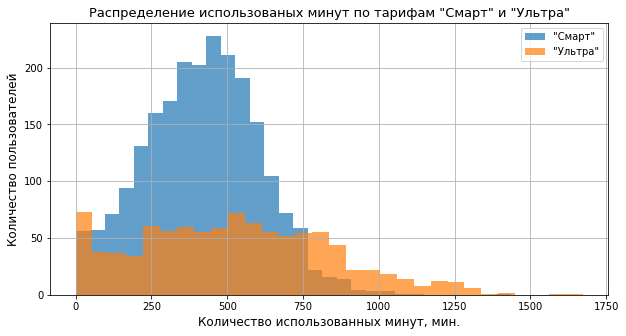

In [84]:
smart_minutes_sum = df.query('tariff_name == "smart"')['minutes_sum']
plt.figure(figsize=(10,5))
plt.hist(smart_minutes_sum, label='"Смарт"', alpha=0.7, bins=30)
plt.xlabel('Количество использованных минут, мин.', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
ultra_minutes_sum = df.query('tariff_name == "ultra"')['minutes_sum']
plt.hist(ultra_minutes_sum, label='"Ультра"', alpha=0.7, bins=30)
plt.xlabel('Количество использованных минут, мин.', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.title('Распределение использованых минут по тарифам "Смарт" и "Ультра"', fontsize=13)
plt.grid()
plt.legend()
plt.show()

In [85]:
import seaborn as sns

Text(0, 0.5, 'Тариф')

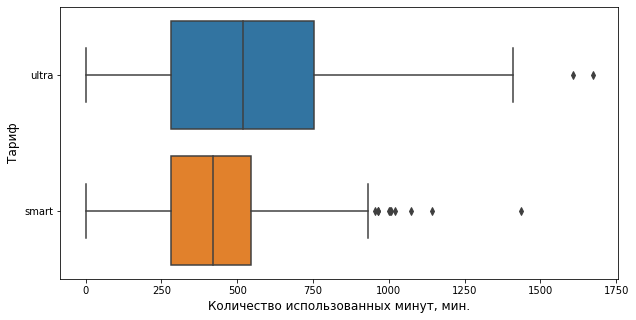

In [86]:
plt.figure(figsize=(10,5))
sns.boxplot(x='minutes_sum', y='tariff_name', data=df)
plt.xlabel('Количество использованных минут, мин.', fontsize=12)
plt.ylabel('Тариф', fontsize=12)

#### Распределения по отправленным сообщениям у тарифов "Смарт" и "Ультра":

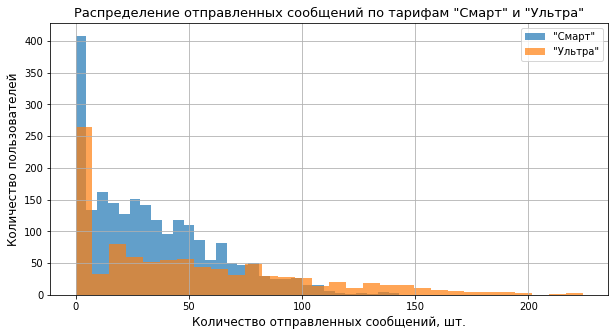

In [87]:
smart_messages_count = df.query('tariff_name == "smart"')['messages_count']
plt.figure(figsize=(10,5))
plt.hist(smart_messages_count, label='"Смарт"', alpha=0.7, bins=30)
plt.xlabel('Количество отправленных сообщений, шт.', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
ultra_messages_count = df.query('tariff_name == "ultra"')['messages_count']
plt.hist(ultra_messages_count, label='"Ультра"', alpha=0.7, bins=30)
plt.xlabel('Количество отправленных сообщений, шт.', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.title('Распределение отправленных сообщений по тарифам "Смарт" и "Ультра"', fontsize=13)
plt.grid()
plt.legend()
plt.show()

Text(0, 0.5, 'Тариф')

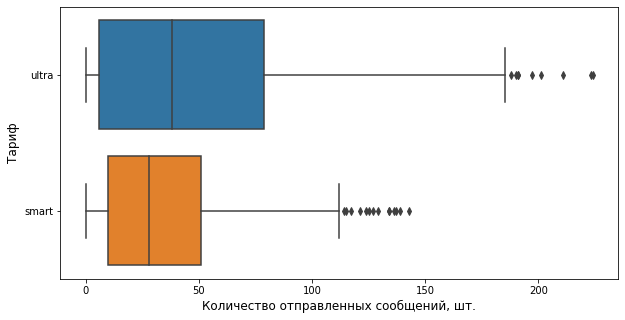

In [88]:
plt.figure(figsize=(10,5))
sns.boxplot(x='messages_count', y='tariff_name', data=df)
plt.xlabel('Количество отправленных сообщений, шт.', fontsize=12)
plt.ylabel('Тариф', fontsize=12)

#### Распределения по использованному траффику у тарифов "Смарт" и "Ультра":

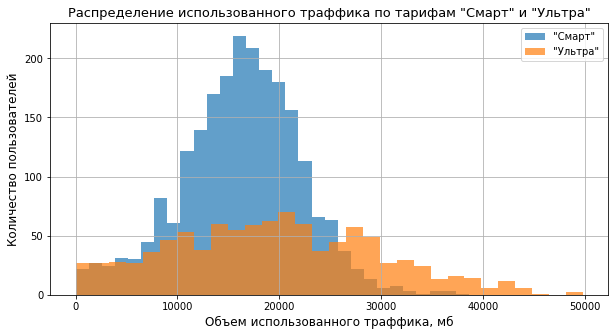

In [89]:
smart_mb_used = df.query('tariff_name == "smart"')['mb_used']
plt.figure(figsize=(10,5))
plt.hist(smart_mb_used, label='"Смарт"', alpha=0.7, bins=30)
plt.xlabel('Объем использованного траффика, мб', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
ultra_mb_used = df.query('tariff_name == "ultra"')['mb_used']
plt.hist(ultra_mb_used, label='"Ультра"', alpha=0.7, bins=30)
plt.xlabel('Объем использованного траффика, мб', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.title('Распределение использованного траффика по тарифам "Смарт" и "Ультра"', fontsize=13)
plt.grid()
plt.legend()
plt.show()

Text(0, 0.5, 'Тариф')

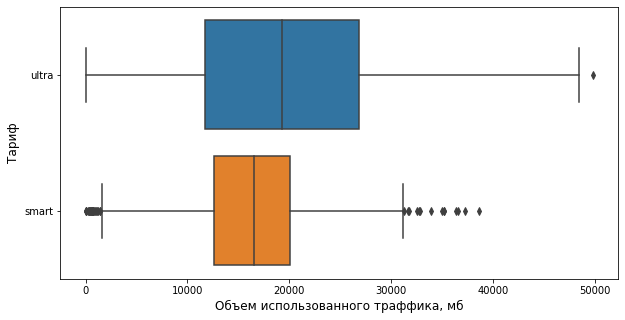

In [90]:
plt.figure(figsize=(10,5))
sns.boxplot(x='mb_used', y='tariff_name', data=df)
plt.xlabel('Объем использованного траффика, мб', fontsize=12)
plt.ylabel('Тариф', fontsize=12)

#### Распределение выручки пользователей тарифов "Смарт" и "Ультра":

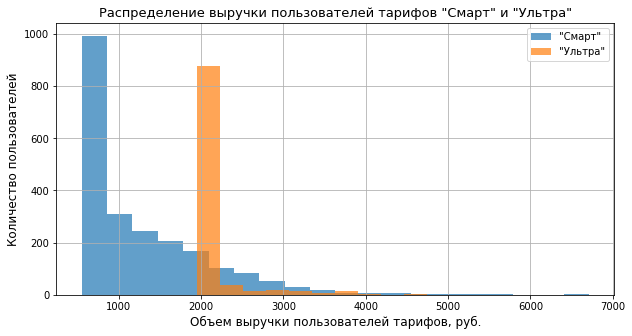

In [91]:
smart_proceeds = df.query('tariff_name == "smart"')['proceeds']
plt.figure(figsize=(10,5))
plt.hist(smart_proceeds, label='"Смарт"', alpha=0.7, bins=20)
plt.xlabel('Объем выручки пользователей тарифов, руб.', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
ultra_proceeds = df.query('tariff_name == "ultra"')['proceeds']
plt.hist(ultra_proceeds, label='"Ультра"', alpha=0.7)
plt.xlabel('Объем выручки пользователей тарифов, руб.', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.title('Распределение выручки пользователей тарифов "Смарт" и "Ультра"', fontsize=13)
plt.grid()
plt.legend()
plt.show()

Text(0, 0.5, 'Тариф')

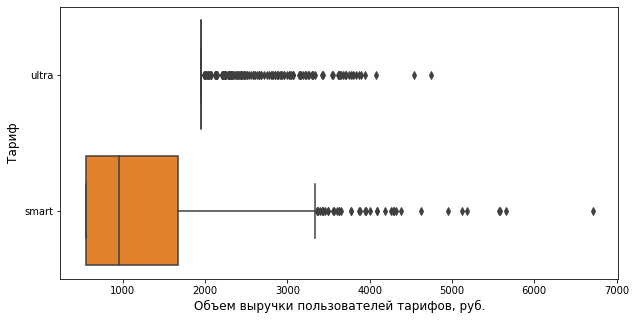

In [92]:
plt.figure(figsize=(10,5))
sns.boxplot(x='proceeds', y='tariff_name', data=df)
plt.xlabel('Объем выручки пользователей тарифов, руб.', fontsize=12)
plt.ylabel('Тариф', fontsize=12)

Рассчитаем средний объем выручки, дисперсию и стандартное отклонение пользователей тарифа "Смарт":

In [93]:
smart_proceeds_mean = users_smart['proceeds'].mean()
smart_proceeds_median = users_smart['proceeds'].median()
smart_proceeds_variance = np.var(users_smart['proceeds'], ddof=1)
smart_proceeds_standard_dev = np.std(users_smart['proceeds'], ddof=1)

print('Средний объем выручки пользователей тарифа "Смарт":', smart_proceeds_mean)
print('Медиана объема выручки пользователей тарифа "Смарт":', smart_proceeds_median)
print('Дисперсия объема выручки пользователей тарифа "Смарт":', smart_proceeds_variance)
print('Стандартное объема выручки пользователей тарифа "Смарт":', smart_proceeds_standard_dev)

Средний объем выручки пользователей тарифа "Смарт": 1232.7515695067264
Медиана объема выручки пользователей тарифа "Смарт": 959.0
Дисперсия объема выручки пользователей тарифа "Смарт": 620156.5735170511
Стандартное объема выручки пользователей тарифа "Смарт": 787.5002054076247


Рассчитаем средний объем выручки, дисперсию и стандартное отклонение пользователей тарифа "Ультра":

In [94]:
ultra_proceeds_mean = users_ultra['proceeds'].mean()
ultra_proceeds_median = users_ultra['proceeds'].median()
ultra_proceeds_variance = np.var(users_ultra['proceeds'], ddof=1)
ultra_proceeds_standard_dev = np.std(users_ultra['proceeds'], ddof=1)

print('Средний объем выручки пользователей тарифа "Ультра":', ultra_proceeds_mean)
print('Медиана объема выручки пользователей тарифа "Ультра":', ultra_proceeds_median)
print('Дисперсия объема выручки пользователей тарифа "Ультра":', ultra_proceeds_variance)
print('Стандартное объема выручки пользователей тарифа "Ультра":', ultra_proceeds_standard_dev)

Средний объем выручки пользователей тарифа "Ультра": 2060.350912778905
Медиана объема выручки пользователей тарифа "Ультра": 1950.0
Дисперсия объема выручки пользователей тарифа "Ультра": 126753.02191287155
Стандартное объема выручки пользователей тарифа "Ультра": 356.02390637830985


**Вывод**

Исходя из полученных гистограмм и диаграмм размаха можно сделать вывод, что: 
1.	пользователи тарифа "Смарт" в среднем проговаривают 421 минуту, тогда как пользователи тарифа "Ультра" проговаривают 518 минут (пользователи тарифа "Ультра" в среднем проговаривают на 97 минут больше);
2.	пользователи тарифа "Смарт" в среднем отправляют 28 сообщений, тогда как пользователи тарифа "Ультра" отправляют 38 сообщений (пользователи тарифа "Ультра" в среднем отправляют на 10 сообщений больше);
3.	пользователи тарифа "Смарт" в среднем используют 16529 мб траффика тогда как пользователи тарифа "Ультра" используют 19320 мб траффика (пользователи тарифа "Ультра" в среднем используют на 2971 мб траффика больше);
4.	пользователи тарифа "Ультра" используют пакет минут, включенных в тариф более распределенно, в остальном гистограммы пользователей "Смарт" и "Ультра" имеют схожий вид;
5.	по построенным диаграммам размаха видно, что у пользователей тарифа "Смарт" гораздо больше выбросов, чем у пользователей тарифа "Ультра" – это означает, что пользователям тарифа "Смарт" в большей степени не хватает того объема минут, сообщений и траффика, что включены в пакет тарифа;
6. средний объем выручки пользователей тарифного плана "Ультра" практически в два раза превышает средний объем выручки пользователей тарифного плана "Смарт" и составляет 2060 руб. против 1232 руб. соответственно;
7. по построенной диаграмме размаха распределения объема выручки также видно, что пользователям тарифа "Ультра" в среднем достаточно того пакета минут, сообщений и траффика, что включены в стоимость абонентской платы, тогда как пользователи тарифа "Смарт" расходуют в среднем в два раза больше средств, размер ежемесячной платы по тарифу. 

## Шаг 4. Проверка гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [95]:
from scipy import stats as st

Сформулируем нулевую гипотезу **H₀** - средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт".
Альтернативная гипотеза **H₁** - средняя выручка пользователей тарифа "Ультра" и средняя выручка пользователей тарифа "Смарт" различаются.

Сформируем выборки со средней выручкой пользователей тарифов smart и ultra:

In [96]:
df.head()

calls_count  minutes_sum  messages_count  mb_used       city  \
user_id month                                                                 
1000    5               17          159              22     2256  краснодар   
        6               28          172              60    23257  краснодар   
        7               41          340              75    14016  краснодар   
        8               42          408              81    14070  краснодар   
        9               46          466              57    14581  краснодар   

              tariff_name  proceeds  
user_id month                        
1000    5           ultra      1950  
        6           ultra      1950  
        7           ultra      1950  
        8           ultra      1950  
        9           ultra      1950

In [97]:
smart_proceeds = df.query('tariff_name == "smart"')['proceeds']
ultra_proceeds = df.query('tariff_name == "ultra"')['proceeds']

In [98]:
alpha = 0.05

results = st.ttest_ind(smart_proceeds, ultra_proceeds, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.1056553659194794e-296
Отвергаем нулевую гипотезу


In [99]:
print('Средняя выручка пользователей тарифа "Смарт": {:.0f} руб.'.format(smart_proceeds.mean()))
print('Средняя выручка пользователей тарифа "Ультра": {:.0f} руб.'.format(ultra_proceeds.mean()))
print('Общая выручка пользователей тарифа "Смарт": {:.0f} руб.'.format(smart_proceeds.sum()))
print('Общая выручка пользователей тарифа "Ультра": {:.0f} руб.'.format(ultra_proceeds.sum()))

Средняя выручка пользователей тарифа "Смарт": 1233 руб.
Средняя выручка пользователей тарифа "Ультра": 2060 руб.
Общая выручка пользователей тарифа "Смарт": 2749036 руб.
Общая выручка пользователей тарифа "Ультра": 2031506 руб.


**Вывод**

Для выбранного уровня значимости отвергаем нулевую гипотезу. Вывод — средняя выручка пользователей тарифа "Ультра" и средняя выручка пользователей тарифа "Смарт" различаются.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем нулевую гипотезу **H₀** - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
Альтернативная гипотеза **H₁** - средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов различаются.

Сформируем выборки с выручкой пользователей из Москвы:

In [100]:
df_Moscow = df.query('city == "москва"')['proceeds']

И выборку с выручкой пользователей из других регионов:

In [101]:
df_other_region = df.query('city != "москва"')['proceeds']

In [102]:
alpha = 0.05

results = st.ttest_ind(df_Moscow, df_other_region, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.45142732216779324
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Для выбранного уровня значимости отвергнуть нулевую гипотезу не получилось. Вывод — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

## Шаг 5. Общий вывод

В данной проектной работе для компании «Мегалайн» — федерального оператора сотовой связи, предварительный анализ тарифных планов «Смарт» и «Ультра». Были выполнены следующие этапы:

1. Изучение файлов с данными и получение общей информации. На данном этапе было выдвинуто предположение, что: 38 клиентов прекратили пользоваться тарифом (услугами оператора); 8 клиентов не пользуются мобильной связью; 3 клиента не пользуются услугой мобильного интернета; 74 клиента не отправляют мобильные сообщения.

2. Выполнена подготовка данных и произведены расчеты сделанных звонков и израсходованных минут, количества отправленных интернет-сообщений и израсходованного интернет-траффика для последующего анализ. Выполнено изменение типа данных в столбцах с датой, в таблицах calls и internet выполнено округление значений использованных минут и мб в большую сторону в соответствии с условиями тарификации мобильного оператора. Выполнена проверка таблиц на наличие дубликатов. Выполнено объединение таблиц с использованием метода merge() и рассчитана помесячная выручка с каждого пользователя.

3. На этапе анализа полученных данных построены гистограммы и диаграммы размаха по информации о звонках, сообщениях и интернет-сессиях. Сделан вывод, что пользователи тарифного плана «Ультра» расходуют из пакета тарифа больше минут, сообщений и интернет-траффика. Пользователям тарифа «Смарт» в большей степени не хватает того объема минут, сообщений и траффика, что включены в пакет тарифа, чем пользователям тарифа «Ультра» - это также видно и по среднему значению выручки пользователей тарифа "Смарт".

4. Проверена гипотеза о различии средней выручки пользователей тарифов «Ультра» и «Смарт», а также гипотеза о различии средней выручки пользователей из Москвы от выручки пользователей из других регионов. Сделаны выводы, что средняя выручка пользователей тарифа "Ультра" и средняя выручка пользователей тарифа "Смарт" различаются, однако средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

Общая выручка пользователей тарифа "Смарт", как наиболее доступного тарифа для клиентов оператора, превышает общую выручку пользователей тарифа "Ультра" в 1,2 раза. Однако, пользователи тарифа "Ультра" являются наиболее привлекательными для компании, поскольку каждый пользователь тарифа приносит в среднем в два раза больше выручки, чем пользователь тарифа "Смарт".

**Рекомендация:**

С учетом выполненной проектной работы и проведенного анализа предлагаю компании Мегалайи сосредоточиться на продвижении тарифа "Ультра". Тариф "Смарт" - самый популярный и доступный на настоящий момент тариф компании и благодаря базовому пакету минут, сообщений и траффика, а также с учетом его доступной стоимости, "Смарт" всегда найдет своих пользователей и без дополнительного продвижения. Однако, проведенный анализ показал, что у тарифа "Смарт" есть слабые места и многим пользователям его оказывается недостаточно - именно поэтому компании Мегалайн необходимо вложиться в продвижение тарифа "Ультра" - как наиболее перспективного тарифа, способного удовлетворить запросы большинства пользователей. И еще один дополнительный фактор в пользу тарифа "Ультра" - пользователь данного тарифа приносит в среднем в два раза больше выручки, чем пользователь тарифа "Смарт", а значит именно он более привлекателен для компании. Таким образом, продвигая тариф "Ультра" можно удовлетворить и потребности клиента и интересы самой компании Мегалайн.